**<font size=5> Module Title: Machine Learning for AI </font>**

**<font size=5> Assessment Title: ML_CA2 </font>**

**<font size=4> Lecturer Name: Dr. David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

**<font size=3> GitHub Link: https://github.com/Awa25/ML_CA2 </font>**

## Scenario:

This CA consists of 2 parts. Neural Networks and Semantic analysis.

<font size = 4> <b><u> Neural Networks </u></b></font>

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame.
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.


<font size = 4> <b><u> Semantic Analysis </u></b></font>

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.

<font size = 4> <b><u> Requirements </u></b></font>

- Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you. [0-30]
- Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm. [0-40]
- Make a Prediction of a new customers income, who is not available in the original dataset. [0-5]
- Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]
- Visualize your sentiment analysis showing the positive, neutral, negative sentiment expressed. [0-5]

# Part 1: Neural Networks

## • Install the necessary libraries

In [1]:
!pip install tensorflow

## • Import necessary libraries

In [173]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## • Data Loading and Exploration

<font size = "3"> Predicting Customer Income using Neural Networks </font>

In [174]:
# Load the dataset
df = pd.read_csv('BankRecords.csv')

In [175]:
# Display the first few rows of the dataframe
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [176]:
# Rename the columns for clarity
df.rename(columns = {'Income(Thousands\'s)': 'Income(Thousands)'}, inplace = True)

### • Data Exploration Let's explore the dataset to understand its structure and identify any potential issues.

In [177]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands)      5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [178]:
# Summary statistics of the dataset
df.describe()

,ID,Age,Experience(Years),Income(Thousands),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [179]:
# Check for missing values
df.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands)        0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

### • Data Preprocessing We'll handle missing values, encode categorical variables, and normalize the data.

In [180]:
# Convert all column names to strings
df.columns = df.columns.astype(str)

In [181]:
# Define feature columns and target column
feature_columns = df.columns.difference(['Income(Thousands)'])
target_column = 'Income(Thousands)'

In [182]:
# Separate features and target
X = df[feature_columns]
y = df[target_column]

In [183]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [184]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [185]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [186]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [187]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## • Neural Network Model

In [189]:
from tensorflow.keras.layers import Dropout

# Build the neural network with dropout regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [190]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

In [191]:
# Train the model - 100 epochs and validation_step at 0.2
history = model.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 32, 
    validation_split = 0.2, 
    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7272.4771 - mae: 71.2397 - val_loss: 3295.3586 - val_mae: 44.0123
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2485.5720 - mae: 37.2845 - val_loss: 1417.5765 - val_mae: 25.6063
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1624.4548 - mae: 30.6329 - val_loss: 1322.6385 - val_mae: 24.3749
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1576.7111 - mae: 30.5167 - val_loss: 1303.7543 - val_mae: 23.8686
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1490.3597 - mae: 29.4455 - val_loss: 1266.6547 - val_mae: 23.5719
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1400.8757 - mae: 28.3295 - val_loss: 1298.4789 - val_mae: 23.7715
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1322.9086 - mae: 28.2909 - val_loss: 1227.6036 - val_mae: 23.3005
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1328.2932 - mae: 27.9689 - val_loss: 1209.6216 - v

Epoch 52/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1016.0149 - mae: 24.5422 - val_loss: 878.8031 - val_mae: 22.7576
Epoch 53/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1079.6863 - mae: 25.2928 - val_loss: 906.8457 - val_mae: 23.1070
Epoch 54/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1110.2643 - mae: 25.8767 - val_loss: 907.4813 - val_mae: 23.1673
Epoch 55/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1020.4698 - mae: 24.8500 - val_loss: 967.2125 - val_mae: 23.8965
Epoch 56/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1031.4434 - mae: 25.0641 - val_loss: 924.0301 - val_mae: 23.3509
Epoch 57/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1005.5922 - mae: 24.5969 - val_loss: 871.7732 - val_mae: 22.8013
Epoch 58/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1099.5875 - mae: 25.6626 - val_loss: 888.4384 - val_mae: 23.0195
Epoch 59/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1129.5361 - mae: 26.0868 - val_loss: 909.5153 - v

In [192]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

# Calculate Mean Squared Error
mse = loss 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1226.8226 - mae: 26.0450 


In [193]:
#print(f"Test Loss: {loss}")

print("Mean Absolute Error on Test Set:", mae)
print("Mean Squared Error on Test Set:", mse)

Mean Absolute Error on Test Set: 25.455398559570312
Mean Squared Error on Test Set: 1121.014892578125


In [194]:
# Predict the values on test data and check the accuracy of the model
nn_predictions = model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [195]:
print(f'Neural Network MSE: {nn_mse}')

Neural Network MSE: 1121.0149799047142


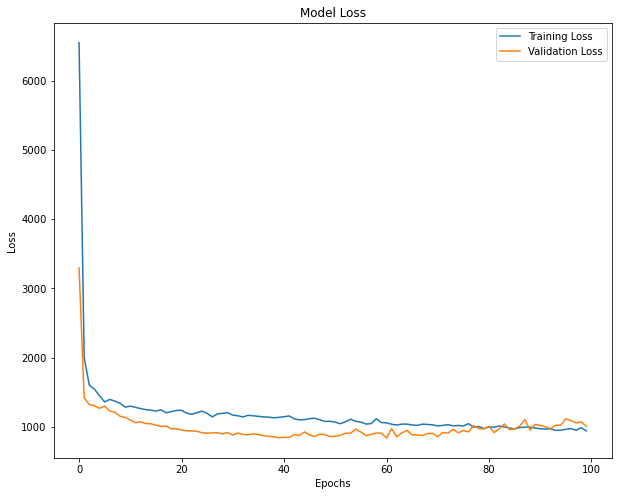

In [196]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

## • Random Forest Regressor

In [197]:
# Separate features and target
X = df.drop(columns = ['Income(Thousands)'])
y = df['Income(Thousands)']

In [198]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [199]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [200]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [201]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [202]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [203]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [204]:
# Predict and evaluate the model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor Test MSE: {rf_mse}")

Random Forest Regressor Test MSE: 436.6706159


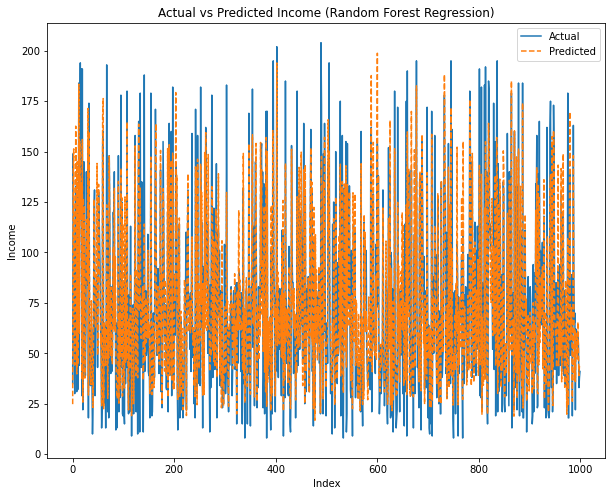

In [205]:
# Plot actual vs predicted values for Random Forest Regression
plt.figure(figsize = (10, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Income (Random Forest Regression)')
plt.xlabel('Index')
plt.ylabel('Income')
plt.legend()
plt.show()

## • Comparing of both Models

In [206]:
# Evaluate the neural network model
#nn_loss = model.evaluate(X_test, y_test)
#print(f"Neural Network Test MSE: {nn_loss}")

print(f'\n• Neural Network Test MSE: {nn_mse}\n')

# Random Forest Regressor Results
print(f"• Random Forest Regressor Test MSE: {rf_mse}")


• Neural Network Test MSE: 1121.0149799047142

• Random Forest Regressor Test MSE: 436.6706159


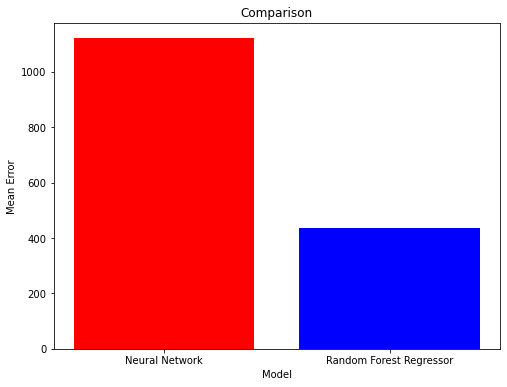

In [207]:
# Plot comparing
plt.figure(figsize = (8, 6))
plt.bar(['Neural Network', 'Random Forest Regressor'], 
        [nn_mse, rf_mse], 
        color = ['red', 'blue'])

plt.title('Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Error')
plt.show()

## • Make a Prediction of a new customers income, who is not available in the original dataset

In [213]:
# Set the random seed to ensure reproducibility
np.random.seed(42)

In [214]:
# Generate the number of rows for the dataset
num_rows = 2000

In [215]:
# Generate random data using numpy
data = {
    "ID": np.arange(1, num_rows + 1),
    "Experience(Years)": np.random.randint(1, 42, size = num_rows),
    "Income(Thousands)": np.random.randint(45000, 60001, size = num_rows),
    "Sort Code": np.random.randint(90000, 95001, size = num_rows),
    "Education": np.random.choice(["Diploma", "Degree", "Masters"], size = num_rows),
    "Mortgage_Thousands": np.random.randint(0, 156, size = num_rows),
    "Personal Loan": np.random.choice(["Yes", "No"], size = num_rows),
}

In [ ]:
# Creat DataFrame
df = pd.DataFrame(data)

In [ ]:
# Convert the Education and Personal Loan columns to numerical values
df['Education'] = df['Education'].map({'Diploma': 1, 'Degree': 2, 'Masters': 3})
df['Personal Loan'] = df['Personal Loan'].map({'No': 0, 'Yes': 1})

In [216]:
# Separate features and labels
X = df.drop(columns = ['ID', 'Income'])
y = df['Income'] / 1000  # Convert income to thousands

In [217]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [218]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [220]:
# Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))  # Output layer

In [221]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse')

In [222]:
# Train the model
model.fit(X_train, y_train, epochs = 100, batch_size = 10, validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2574.4785 - val_loss: 216.4083
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.9693 - val_loss: 57.0798
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.3575 - val_loss: 48.9356
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.1687 - val_loss: 44.9188
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.8446 - val_loss: 38.4937
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.2363 - val_loss: 34.3746
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.3242 - val_loss: 32.1059
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.8153 - val_loss: 28.5582
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.9963 - val_loss: 28.5622
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7942 - val_loss: 24.8953
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.0440 - val_loss: 24.2128
Epoch 12/100
128

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.0809 - val_loss: 20.2028
Epoch 68/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4827 - val_loss: 21.9552
Epoch 69/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.1361 - val_loss: 20.4582
Epoch 70/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.6573 - val_loss: 21.4167
Epoch 71/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4547 - val_loss: 21.2225
Epoch 72/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.0927 - val_loss: 20.3785
Epoch 73/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3201 - val_loss: 20.7258
Epoch 74/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3547 - val_loss: 22.1024
Epoch 75/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.2410 - val_loss: 20.9560
Epoch 76/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5497 - val_loss: 20.7184
Epoch 77/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9391 - val_loss: 22.7834
Epoch 78/100
128/128 ━━

In [223]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.0054  
Model Loss: 18.675710678100586


In [224]:
# Predict income for new customers
# New customer data should have the same number and order of features as the training data
new_customers = np.array([
    [28, 92000, 2, 50, 1],  # Example of new customer 1
    [50, 91000, 3, 100, 0]  # Example of new customer 2
])  # Example new customer data

In [225]:
# Standardize new data
new_customers = scaler.transform(new_customers)  
predictions = model.predict(new_customers)
print(f'Predicted Income (in thousands): {predictions.flatten()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Income (in thousands): [51.173153 57.093998]


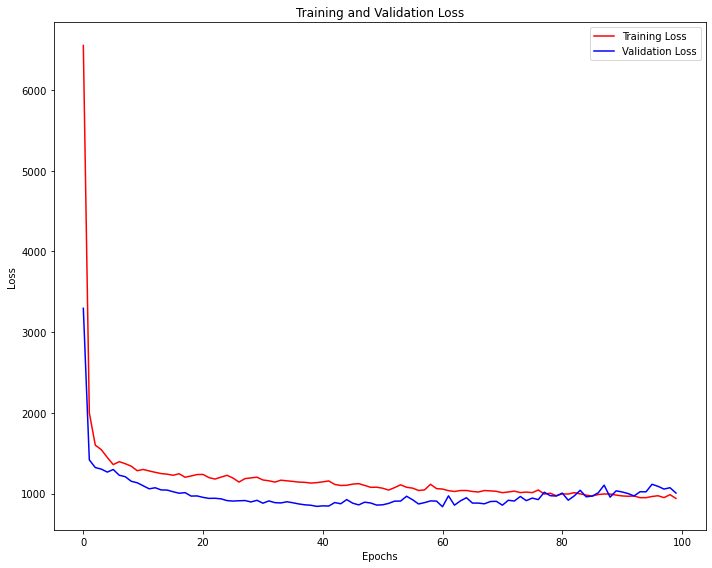

In [231]:
# Plot predictions
plt.figure(figsize=(10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()